Student name: Nicholas Murphy

Student ID: 21268819

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn.metrics import silhouette_score
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle
from yellowbrick.cluster import SilhouetteVisualizer # pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
import warnings
#warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

 

import os
os.environ["OMP_NUM_THREADS"] = "3" 

In [113]:
df = pd.read_csv("./loans_train_prepared-1.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)
df_copy = df.copy()

(number of examples, number of attributes):  (614, 16)


In [114]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)
data_copy = data.copy()


## Task 2
* Plot the sum of squared distances from the data points (in loans_train_prepared.csv) to the centers of the k-means clusters for various values of k. Use the Elbow method to pick the best value of k.
  * ✅ - done. got values 2,3,4
* Attempt also another method for determining the best value of k. Use the best value(s) of k to cluster the loans_train_prepared dataset with k-means. Aim at producing meaningful clustering.
  * ✅ - used silhoutte, no definitive value for k, seems to favour the upper bounds of the value list provided. We get k=150 if we really through a large number of values at it but that seems really high to me.
* Use at least two different methods for visualising the clustering. Write a short conclusion about the characteristics of the clusters (max 250 words in a markdown cell).
  * ✅ - done - using kMeans and Ward/AgglomerativeClustering 

In [115]:
def do_KMeans(data, cluster_list, n_init, max_iter):
    sse = {}
    change = []
    previous_sse = 0
    for k in cluster_list:
        kmeans = KMeans(n_clusters=k, n_init=n_init, max_iter=max_iter).fit(data)
       # data["clusters"] = kmeans.labels_
        #print(data["clusters"])
        sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
        if previous_sse != 0:
            change.append(previous_sse - kmeans.inertia_)
        previous_sse = kmeans.inertia_
    change_arr = np.array(change)
    ind = np.argpartition(change_arr, -3)[-3:]
    ind = np.flip(ind)

    plt.figure(figsize=(14,10))
    plt.plot(list(sse.keys()), list(sse.values()))
    colors=['red','orange','green']
    position=['Best','2nd best','3rd best']
    for i in ind:
        plt.plot(i+2, sse[i+2], color=colors[i], marker='*', markersize=20)
        print ("{position} K value (in {color}) is {k}".format(position=position[i], color=colors[i], k=[i+2]))
        
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.title("KMeans - n_init = {n_init}, max_iter = {max_iter}".format(n_init=n_init, max_iter=max_iter))
    plt.show()

Run the data against K means, with a variety of parameters:
* cluster ranges
* n_init - number of times k-means run with different centroid seeds
* max_iterations

Best K value (in red) is [2]
2nd best K value (in orange) is [3]
3rd best K value (in green) is [4]


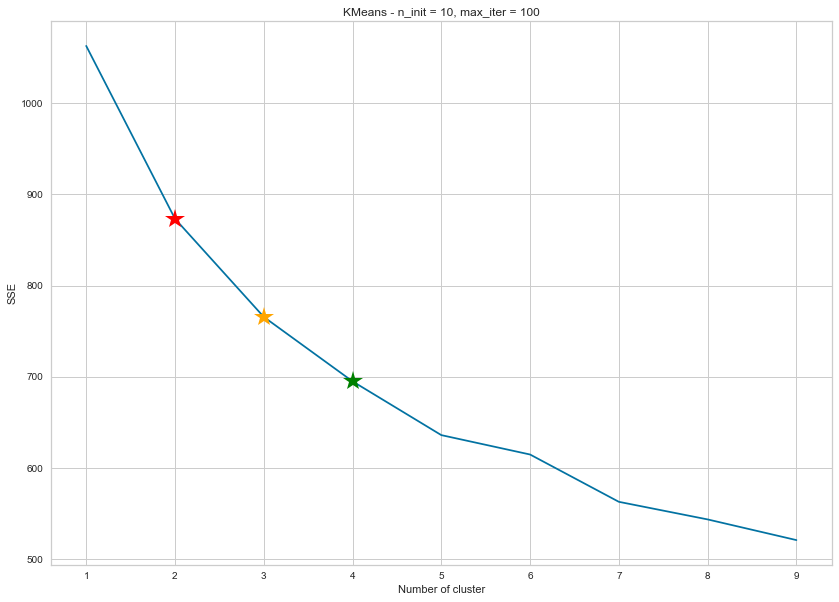

Best K value (in red) is [2]
2nd best K value (in orange) is [3]
3rd best K value (in green) is [4]


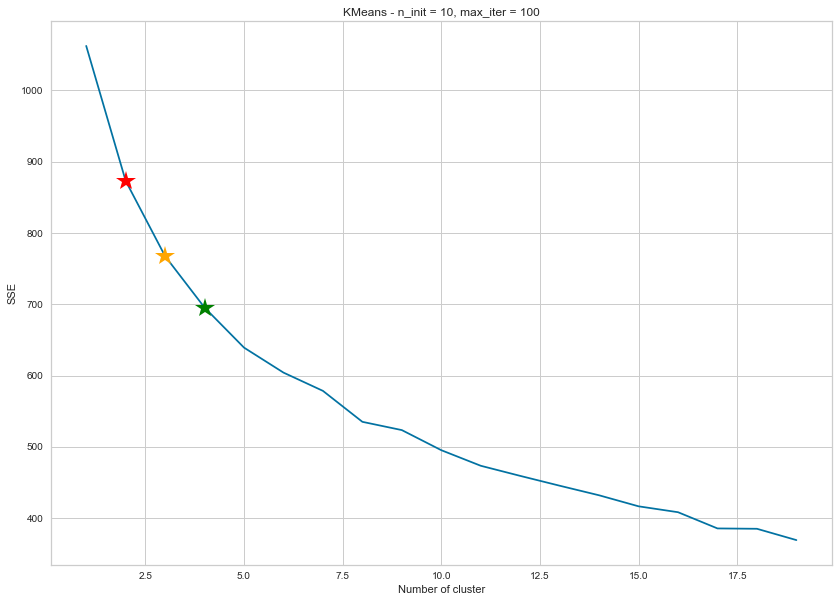

Best K value (in red) is [2]
2nd best K value (in orange) is [3]
3rd best K value (in green) is [4]


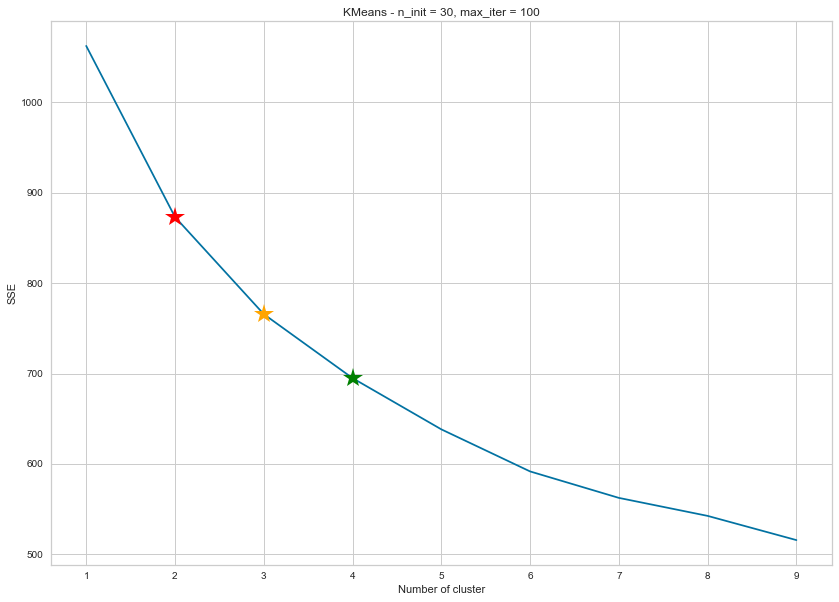

Best K value (in red) is [2]
2nd best K value (in orange) is [3]
3rd best K value (in green) is [4]


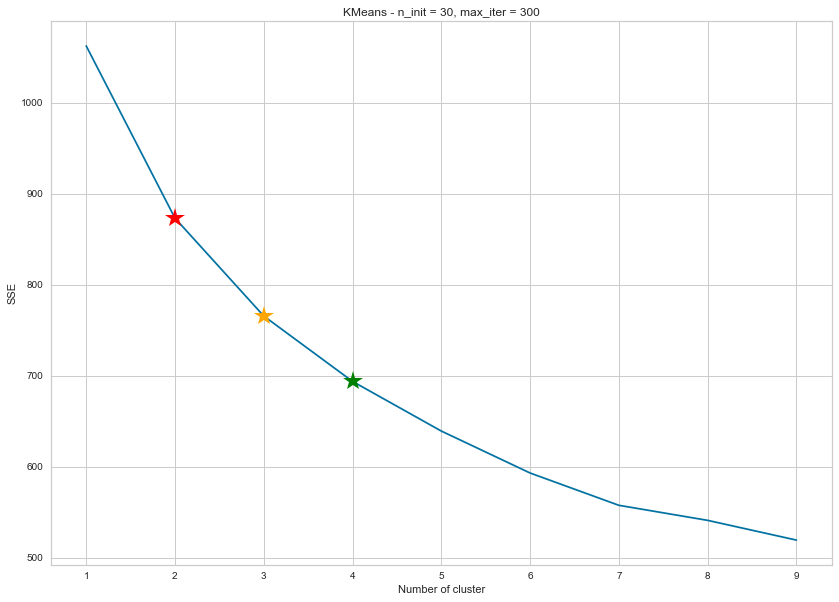

Best K value (in red) is [2]
2nd best K value (in orange) is [3]
3rd best K value (in green) is [4]


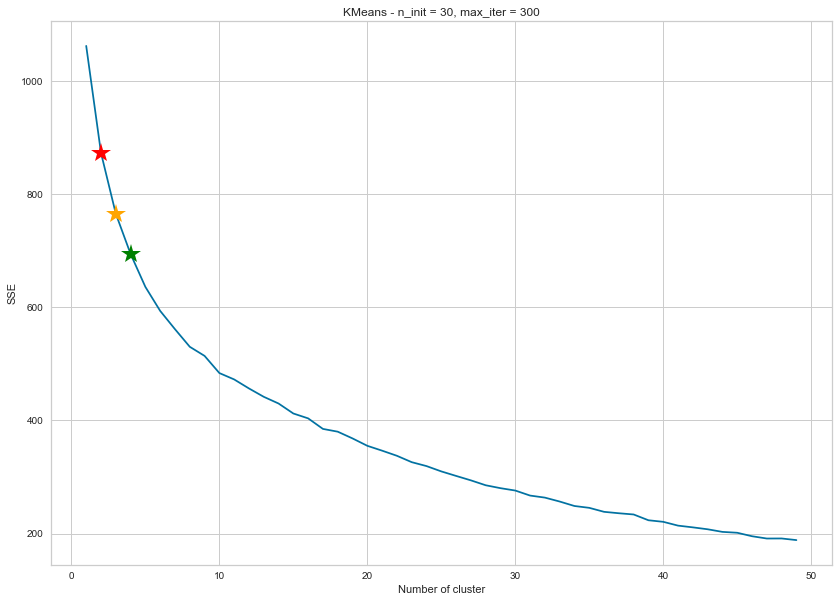

In [116]:
do_KMeans(data, range(1,10), 10, 100)
do_KMeans(data, range(1,20), 10, 100)
do_KMeans(data, range(1,10), 30, 100)
do_KMeans(data, range(1,10), 30, 300)
do_KMeans(data, range(1,50), 30, 300)

### KElbow Visualiser
Try an out of the box visualization tool 

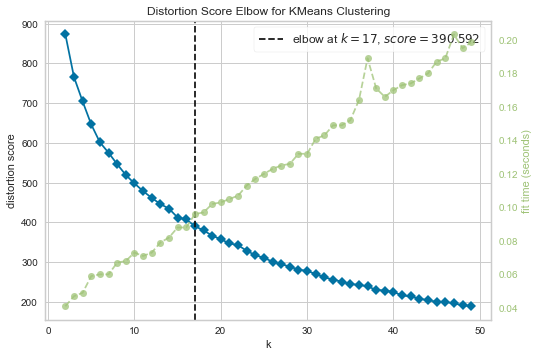

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [117]:
km = cluster.KMeans(random_state=50)
visualizer = KElbowVisualizer(km, k=(2,50))
 
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### K-Means Conclusion
Doesn't seem to matter much what parameters are thrown at the k-Means algorithm, as the same three top cluster values found are always 2,3 and 4.
Out of the box tool is giving me k=17. It must know something I don't - I'm not seeing anything indicating it on any graph I've created.


### Silhouette

In [118]:
def do_silhouette(data, cluster_list, n_init, max_iter, verbose=False ):
    sil_coeffs=[]
    for n_cluster in cluster_list:
        kmeans = KMeans(n_clusters=n_cluster,n_init=n_init, max_iter=max_iter, random_state=50).fit(data)
        label = kmeans.labels_
        sil_coeff = silhouette_score(data, label, metric='euclidean')
        if verbose:
            print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
        sil_coeffs.append(sil_coeff)

    max_value = max(sil_coeffs)
    max_index = sil_coeffs.index(max_value)
    plt.figure(figsize=(14,10))
    plt.plot(cluster_list, sil_coeffs)
    plt.plot(max_index+2,max_value, color="red", marker="*", markersize=20)
    plt.xlabel("Number of cluster")
    plt.ylabel("Silhouette coeff")
    plt.title("silhouette - n_init = {n_init}, max_iter = {max_iter}, k = {k}".format(n_init=n_init, max_iter=max_iter, k=max_index+2))

    plt.show()

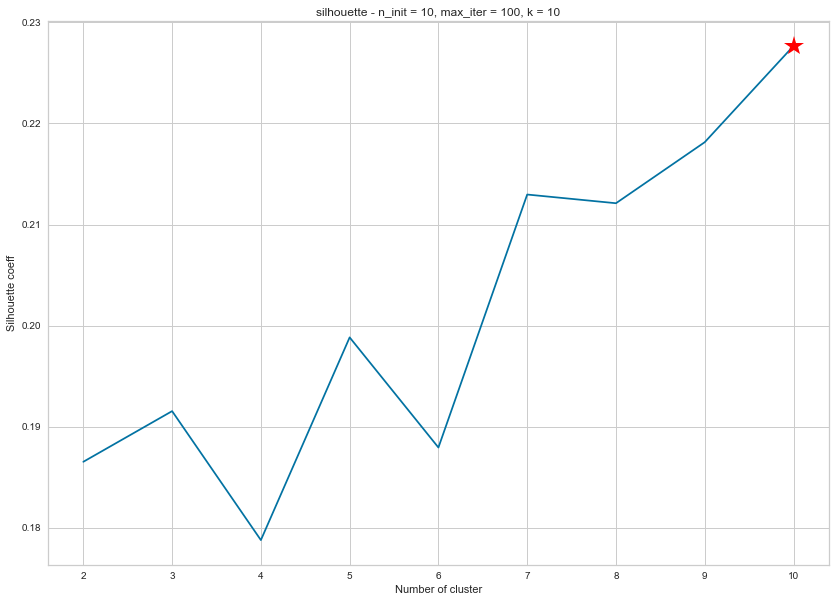

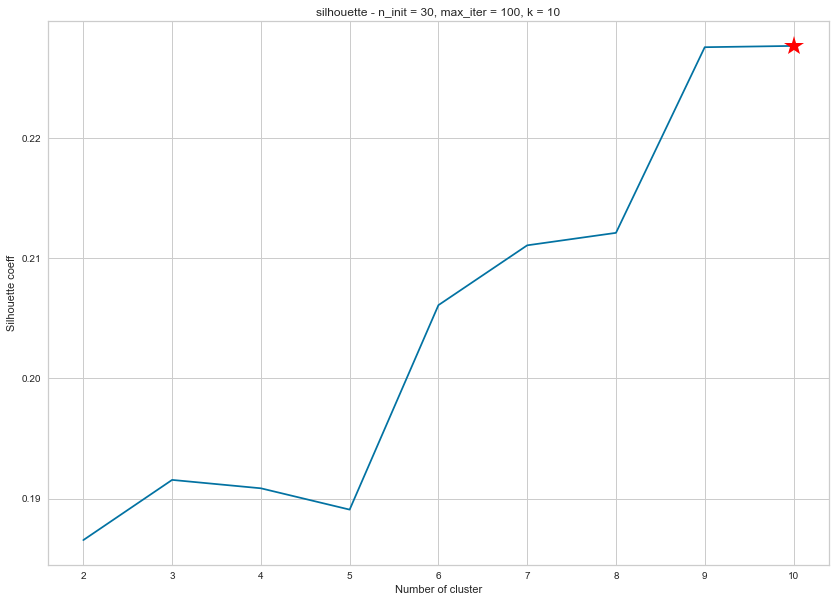

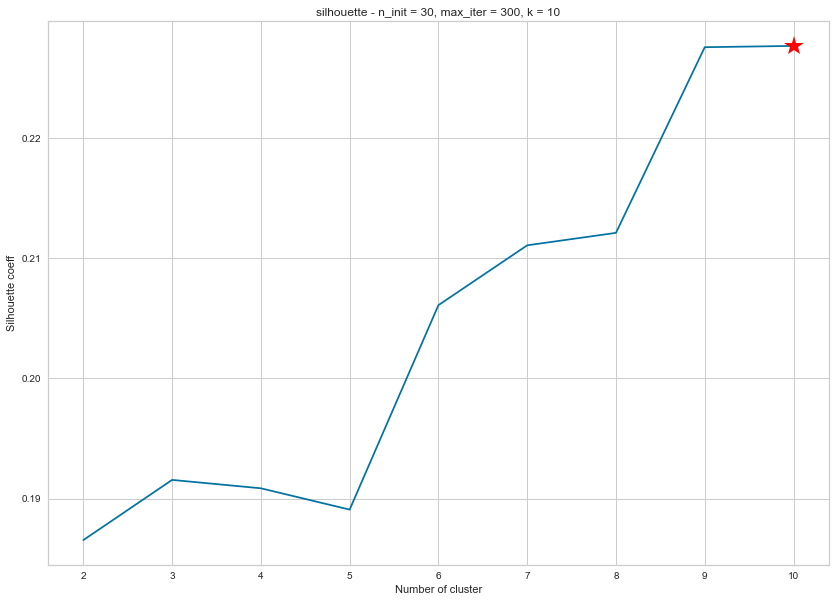

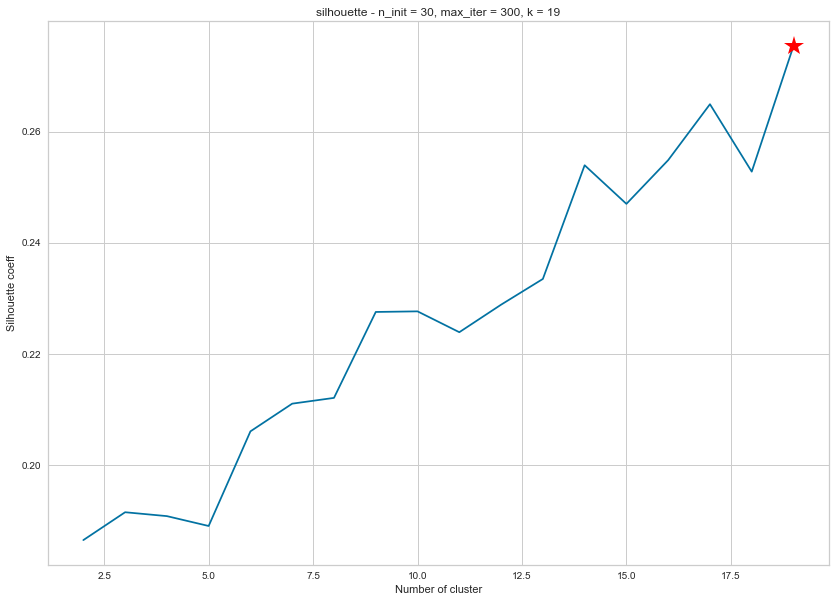

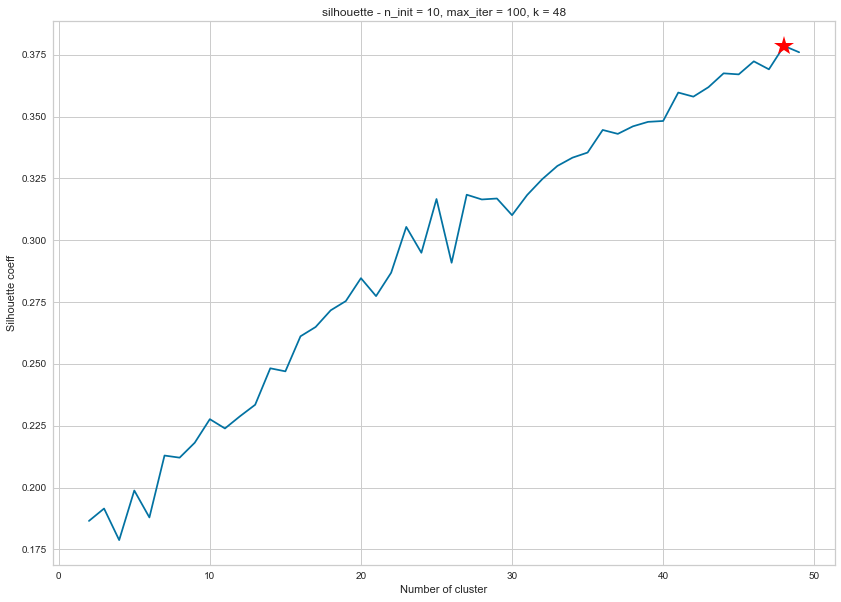

In [119]:
do_silhouette(data,range(2,11),10,100)
do_silhouette(data,range(2,11),30,100)
do_silhouette(data,range(2,11),30,300)
do_silhouette(data,range(2,20),30,300)
do_silhouette(data,range(2,50),10,100)

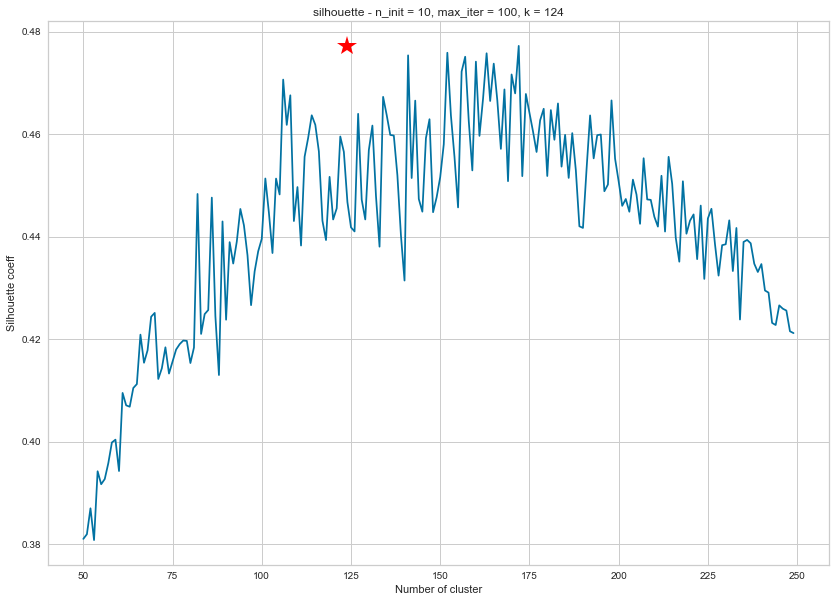

In [120]:
do_silhouette(data,range(50,250),10,100)

### Silhoutte Conclusion
I've locked the random_state to 50 to try and work with a similar data set. Still, almost irrespective of the parameters, it appears the value of k just rises with the range of clusters. The graph remains on a constant upward trajectory. 

I've tried a last graph (k=50 to 250) to see if we can find an actual apex value after which the general height starts to go down. We do find it at k=150, but that seems massively high to me.


In [121]:
colors = np.array(['orange', 'blue', 'lime', 'brown', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### Task 2/Task 3 - clustering by KMeans and AgglomerativeClustering/Ward

I've written some functions that will run the data through kmeans and ward Agglomerative clustering, and then using MDS/Isomap/Spectral and TSNE manifolds to map down to two dimensions

#### new attempt start

In [122]:
colors = np.array(['orange', 'blue', 'lime', 'brown', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot_ax(points, labels, centers, title, ax):
    """same as provided code, except for subplots

    Args:
        points (_type_): _description_
        labels (_type_): _description_
        centers (_type_): _description_
        title (_type_): _description_
        ax (_type_): _description_
    """
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = ax.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        ax.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = ax.title.set_text(title)
    _ = ax.legend()
    _ = ax.set_xlabel('x')
    _ = ax.set_ylabel('y')

In [123]:
def plot_clustering(mds,iso,spectral,tsne):
    """plot the 4 manifold clustering algos 

    Args:
        mds (_type_): _description_
        iso (bool): _description_
        spectral (_type_): _description_
        tsne (_type_): _description_
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize = (20,14))
    clustering_scatterplot_ax(mds["points"],mds["labels"],mds["centers"],mds["type"],ax1)
    clustering_scatterplot_ax(iso["points"],iso["labels"],iso["centers"],iso["type"],ax2)
    clustering_scatterplot_ax(spectral["points"],spectral["labels"],spectral["centers"],spectral["type"],ax3)
    clustering_scatterplot_ax(tsne["points"],tsne["labels"],tsne["centers"],tsne["type"],ax4)

In [124]:
def do_kmeans_clustering_multi(data,num_clusters,n_init =10, max_iter=300,  metric=True ):

    k=num_clusters
    clusters = cluster.KMeans(n_clusters=k, n_init=n_init, max_iter=max_iter, random_state=50).fit(data)
    data_and_centers = np.r_[data,clusters.cluster_centers_]
    XYcoordinatesMDS = manifold.MDS(n_components=2, max_iter=max_iter,metric=metric).fit_transform(data_and_centers)
    XYcoordinatesISO = manifold.Isomap(n_components=2, max_iter=max_iter).fit_transform(data_and_centers)
    XYcoordinatesSpectral = manifold.SpectralEmbedding(n_components=2).fit_transform(data_and_centers)
    XYcoordinatesTSNE = manifold.TSNE(n_components=2).fit_transform(data_and_centers)

    mds={
        "points":XYcoordinatesMDS[:-k,:], 
        "labels":clusters.labels_, 
        "centers":XYcoordinatesMDS[-k:,:], 
        "type": "KMeans/MDS"
    }
    iso={
        "points":XYcoordinatesISO[:-k,:], 
        "labels":clusters.labels_, 
        "centers":XYcoordinatesISO[-k:,:], 
        "type": "KMeans/Isomap"
    }
    spec={
        "points":XYcoordinatesSpectral[:-k,:], 
        "labels":clusters.labels_, 
        "centers":XYcoordinatesSpectral[-k:,:], 
        "type": "KMeans/Spectral"
    }
    tnse={
        "points":XYcoordinatesTSNE[:-k,:], 
        "labels":clusters.labels_, 
        "centers":XYcoordinatesTSNE[-k:,:], 
        "type": "KMeans/TSNE"
    }
    plot_clustering(mds,iso,spec,tnse)
    return pd.Series(clusters.labels_, index=df.index)

In [125]:
def do_ward_clustering_multi(data,num_clusters,n_init =10, max_iter=300,  metric=True ):

    k=num_clusters
    #clusters = cluster.KMeans(n_clusters=k, n_init=n_init, max_iter=max_iter, random_state=50).fit(data)
    clusters = AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='ward').fit(data)
    data_and_centers = data
    XYcoordinatesMDS = manifold.MDS(n_components=2, max_iter=max_iter,metric=metric).fit_transform(data_and_centers)
    XYcoordinatesISO = manifold.Isomap(n_components=2, max_iter=max_iter).fit_transform(data_and_centers)
    XYcoordinatesSpectral = manifold.SpectralEmbedding(n_components=2).fit_transform(data_and_centers)
    XYcoordinatesTSNE = manifold.TSNE(n_components=2).fit_transform(data_and_centers)

    mds={
        "points":XYcoordinatesMDS, 
        "labels":clusters.labels_, 
        "centers":None, 
        "type": "Ward/MDS"
    }
    iso={
        "points":XYcoordinatesISO, 
        "labels":clusters.labels_, 
        "centers":None, 
        "type": "Ward/Isomap"
    }
    spec={
        "points":XYcoordinatesSpectral, 
        "labels":clusters.labels_, 
        "centers":None, 
        "type": "Ward/Spectral"
    }
    tnse={
        "points":XYcoordinatesTSNE, 
        "labels":clusters.labels_, 
        "centers":None, 
        "type": "Ward/TSNE"
    }
    plot_clustering(mds,iso,spec,tnse)
    return pd.Series(clusters.labels_, index=df.index)

C:\Users\nmmur\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\nmmur\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\nmmur\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


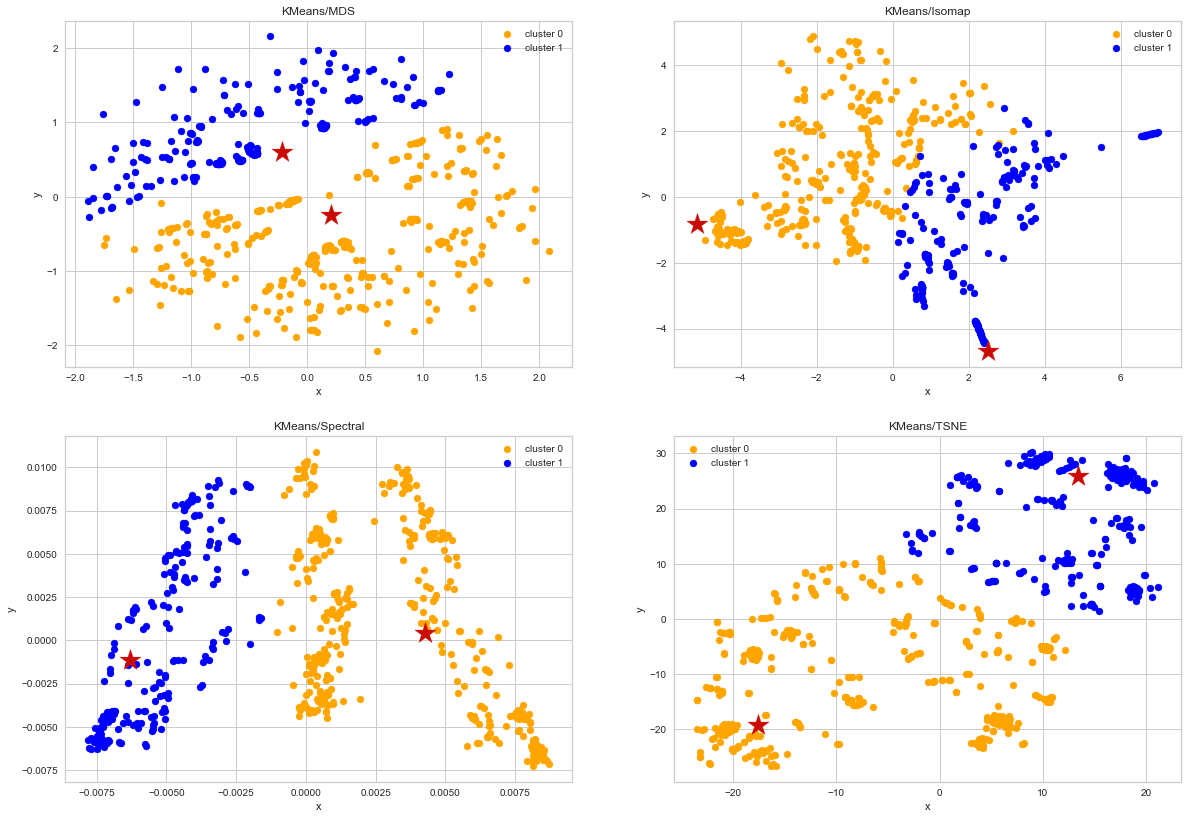

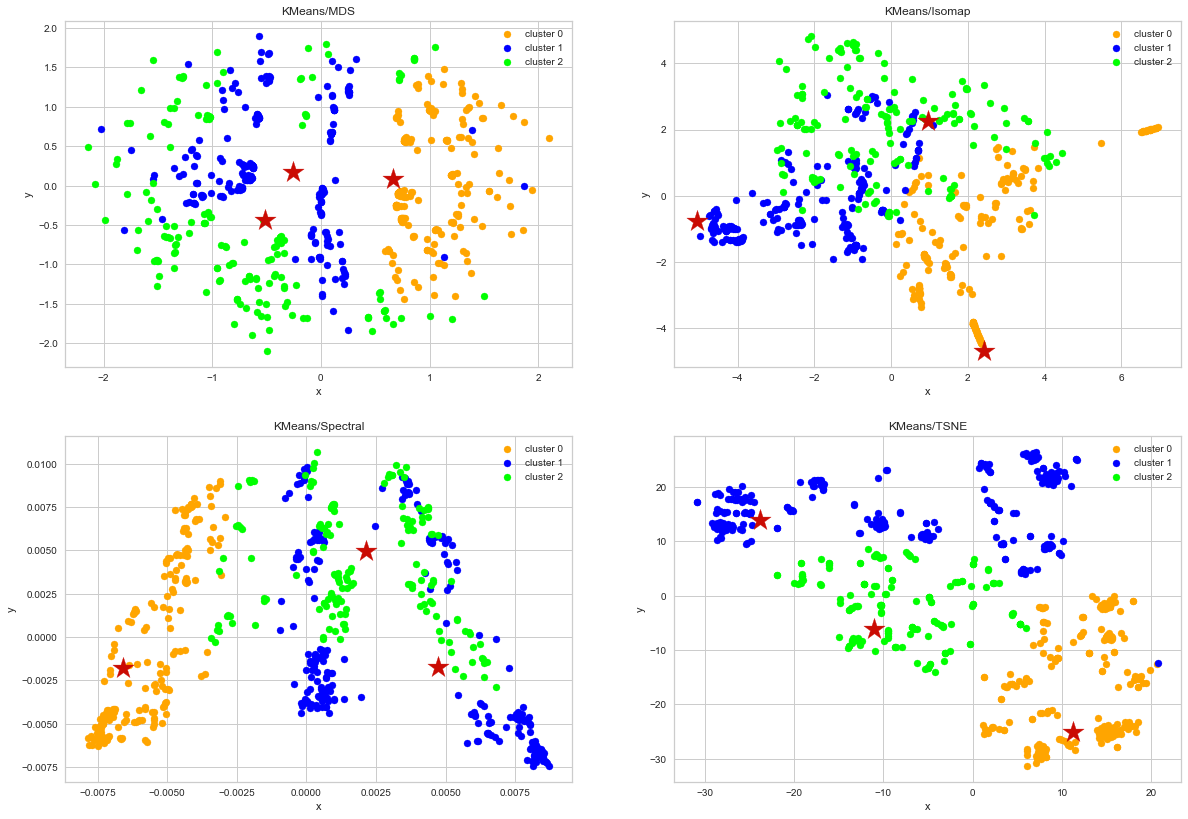

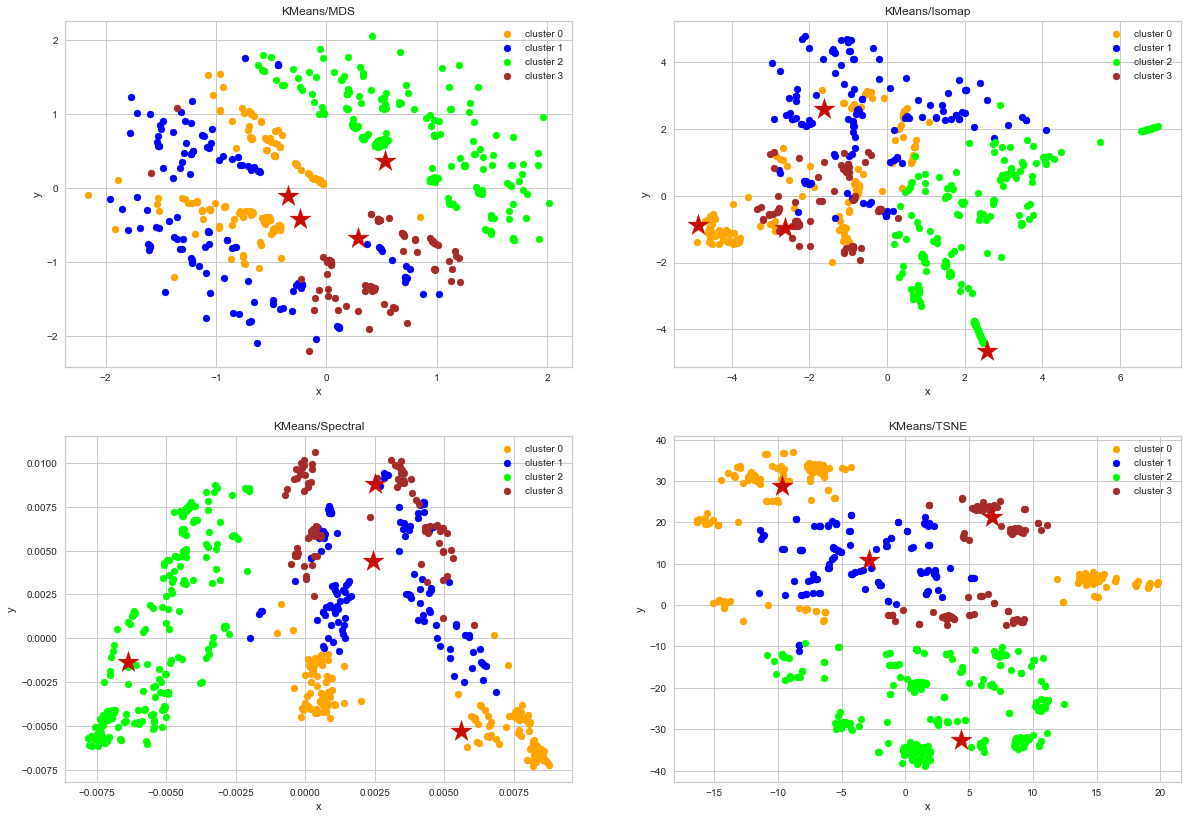

In [126]:
x=do_kmeans_clustering_multi(data,2)
x=do_kmeans_clustering_multi(data,3)
x=do_kmeans_clustering_multi(data,4)

#### new attempt end

### Get the mean values for the data, grouped by cluster
Define the characteristics of each group from this data.

In [127]:
df_copy = df.copy()
dcc = data_copy.copy()
clusters = cluster.KMeans(n_clusters=4, n_init=10, max_iter=300, random_state=50).fit(dcc)
df_copy['cluster']=pd.Series(clusters.labels_, index=df.index)
means = df_copy.groupby('cluster').mean()
#means.to_excel("means.xlsx")
means.style.background_gradient(cmap="RdYlGn")

Group 1:
* Had the most dependents
* Highest income
* Highest loan amount
* Best credit history
* Almost entirely male
* Married
* Not semi-Urban
* loan has been approved
* has highest total incomes
* shortest loan term

Group 2:
* Worst credit history 
* mostly male
* highest likelihood of not being a graduate
* least likely to have been approved.

Group 3:
* most likely to not provide genital/marital status
* suburban

Group 4:
* fewest Dependents
* lowest income
* smallest loan amount
* longest term
* best credit history
* higher likelihood of being female
* unmarried
* most likely of groups to be a graduate
* not semi-Urban
* 2nd most likely to have had loan approved.
  

### Clustering conclusion
Having run the kmeans clustering for the three best K values from the elbow diagram, I felt that 4 clusters was giving me the optimum results. This has been borne out by applying those clustering values to the dataframe and getting the mean values based on those groups. The characteristics of these groups is described above. Clearly Kmeans has produced definitive results. It is clear that each cluster has definable characteristics.


## Task 3
* Use another clustering algorithm (from the ones available in scikit-learn) for the loans_train_prepared dataset and an appropriate manifold-learning technique to visualise it.
  * ✅ - done, using ward clustering in place of kmeans clustering 
* Discuss the differences between the k-Means clustering and the clustering found by the second algorithm you have tried in words (max 250 words in a markdown cell) and by visualising the clusterings with an appropriate manifold-learning technique.
  * ✅ - done, utilising MDS/Isomap/Spectral/TNSE manifolds.


C:\Users\nmmur\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\nmmur\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\nmmur\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


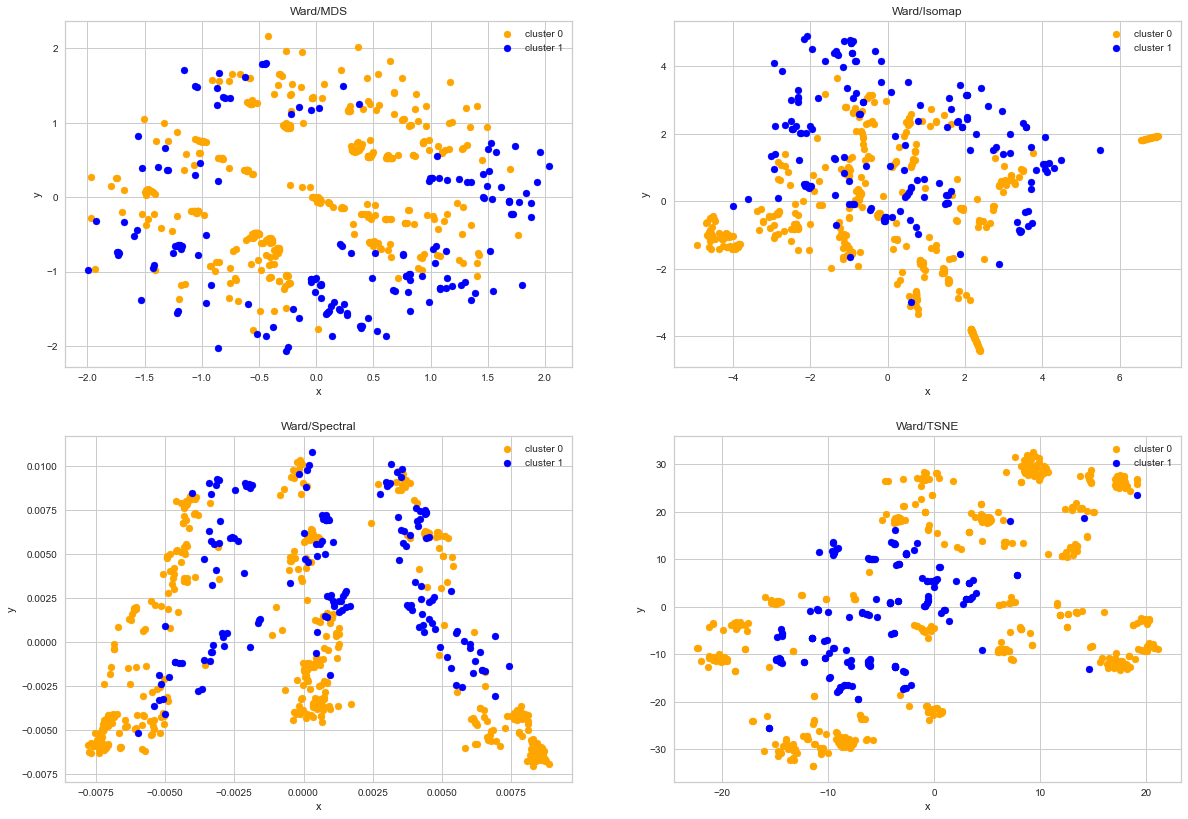

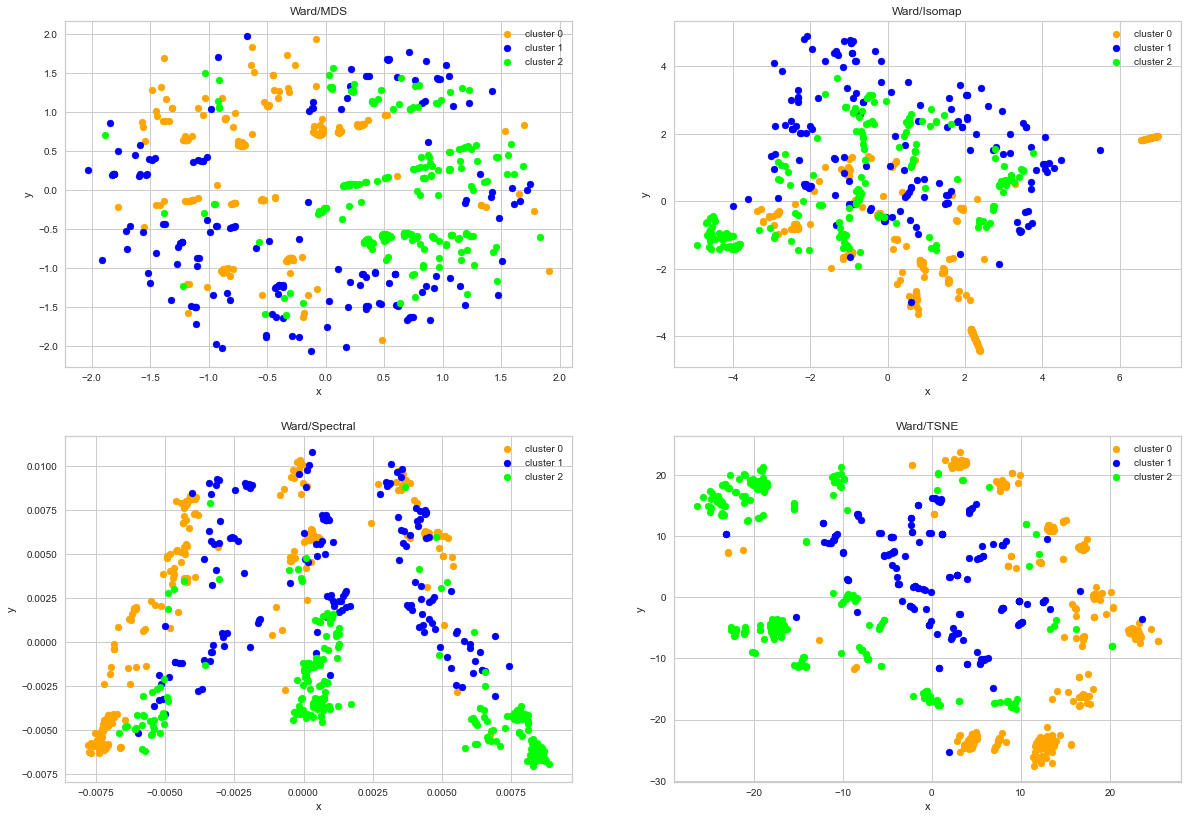

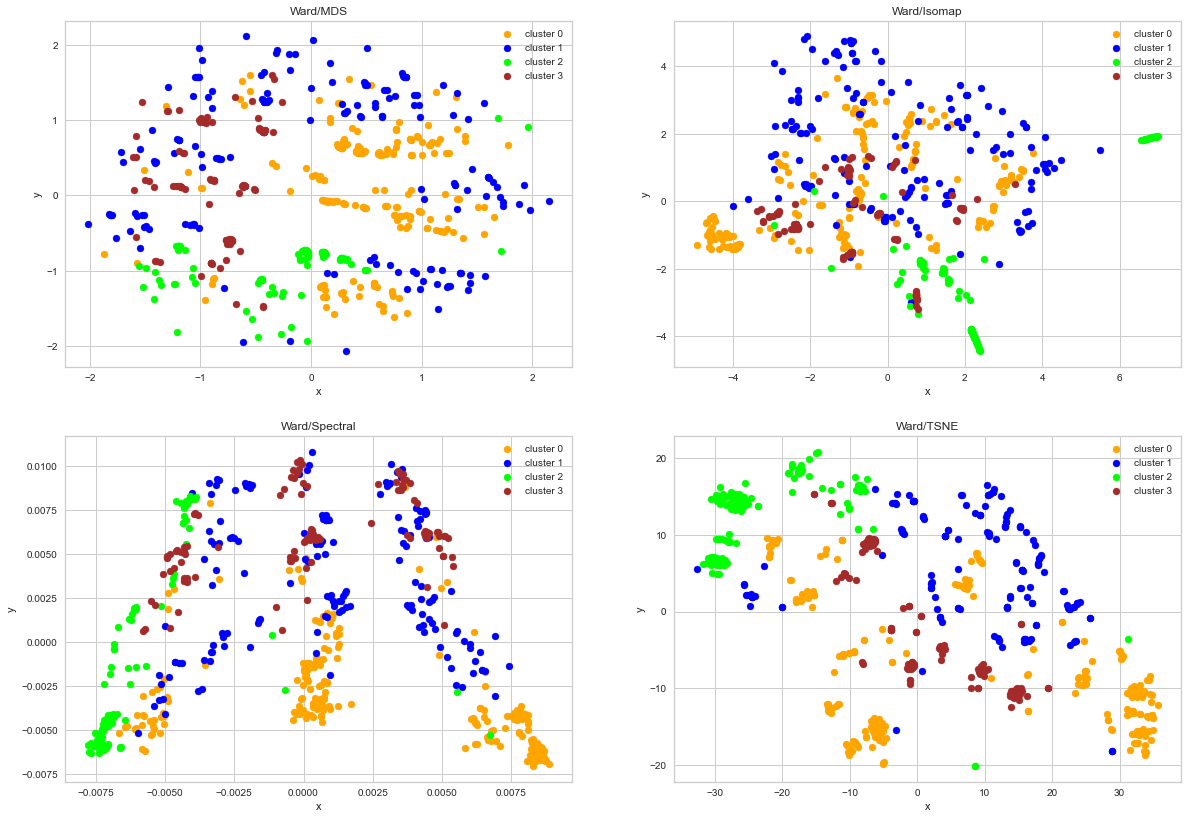

In [128]:
x=do_ward_clustering_multi(data,2)
x=do_ward_clustering_multi(data,3)
x=do_ward_clustering_multi(data,4)

### task3 conclusion

I've run my best three values of K against Kmeans and Ward agglomoration. From what I can tell, Kmeans seems to be giving better results in that the clusters are more defined whereas ward appears to me to be a little more chaotic. This can been seen by comparing the best output Kmeans/TSNE against Ward/TSNE. Wards graph isn't as tight as Kmeans - the groups aren't as tight, and they overlap quite a lot, in contrast to the clear segregated groups of kmeans/TSNE
